**SETUP**

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
import sys
sys.path.insert(0,'classes')
import grafica as grafica
from ClassNeuronaLineal import NeuronaLineal

**Ejercicio 7**

A partir de los ejemplos del archivo AUTOS.csv, utilizado en la práctica 1, se entrenará un combinador lineal para predecir el precio del auto (atributo 'price') en función del tamaño del motor (atributo 'engine-size'):

In [246]:
df_autos = pd.read_csv('data/cars.csv')
print(df_autos.dtypes)

normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
dtype: object


In [247]:
# Count element of price column
price_elems_count = len(df_autos['price'])

# Prepare array for prediction
x = np.array(df_autos['engine-size'])
d = np.zeros(shape=price_elems_count, dtype=int)

In [248]:
df_autos.price.unique

<bound method Series.unique of 0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64>

**a)** Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo 'price' utilizando el valor promedio.

In [249]:
# ANALIZO POSIBLES VALORES PARA LA COLUMNA PRICE
print('Price (before):', df_autos.price.unique())

Price (before): [13495. 16500. 13950. 17450. 15250. 17710. 18920. 23875.    nan 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.  6479.
  6855.  5399.  6529.  7129.  7295.  7895.  9095.  8845. 10295. 12945.
 10345.  6785. 11048. 32250. 35550. 36000.  5195.  6095.  6795.  6695.
  7395. 10945. 11845. 13645. 15645.  8495. 10595. 10245. 10795. 11245.
 18280. 18344. 25552. 28248. 28176. 31600. 34184. 35056. 40960. 45400.
 16503.  5389.  6189.  6669.  7689.  9959.  8499. 12629. 14869. 14489.
  6989.  8189.  9279.  5499.  7099.  6649.  6849.  7349.  7299.  7799.
  7499.  7999.  8249.  8949.  9549. 13499. 14399. 17199. 19699. 18399.
 11900. 13200. 12440. 13860. 15580. 16900. 16695. 17075. 16630. 17950.
 18150. 12764. 22018. 32528. 34028. 37028.  9295.  9895. 11850. 12170.
 15040. 15510. 18620.  5118.  7053.  7603.  7126.  7775.  9960.  9233.
 11259.  7463. 10198.  8013. 11694.  5348.  6338.  6488.  691

In [250]:
# Reemplazar los NaN con el promedio de la columna
df_autos['price'] = df_autos['price'].fillna(df_autos['price'].mean())

In [251]:
i = 0
for p in df_autos['price']:
    d[i] = p
    i = i + 1

**b)** Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

1. Sin normalizar los atributos.
2. Normalizando ambos atributos linealmente.
3. Normalizando ambos atributos utilizando media y desvío.

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

In [252]:
x = x.reshape(-1,1)
x

array([[130],
       [130],
       [152],
       [109],
       [136],
       [136],
       [136],
       [136],
       [131],
       [131],
       [108],
       [108],
       [164],
       [164],
       [164],
       [209],
       [209],
       [209],
       [ 61],
       [ 90],
       [ 90],
       [ 90],
       [ 90],
       [ 98],
       [ 90],
       [ 90],
       [ 90],
       [ 98],
       [122],
       [156],
       [ 92],
       [ 92],
       [ 79],
       [ 92],
       [ 92],
       [ 92],
       [ 92],
       [110],
       [110],
       [110],
       [110],
       [110],
       [110],
       [111],
       [ 90],
       [ 90],
       [119],
       [258],
       [258],
       [326],
       [ 91],
       [ 91],
       [ 91],
       [ 91],
       [ 91],
       [ 70],
       [ 70],
       [ 70],
       [ 80],
       [122],
       [122],
       [122],
       [122],
       [122],
       [122],
       [140],
       [134],
       [183],
       [183],
       [183],
       [183],
      

**Sin normalizar**

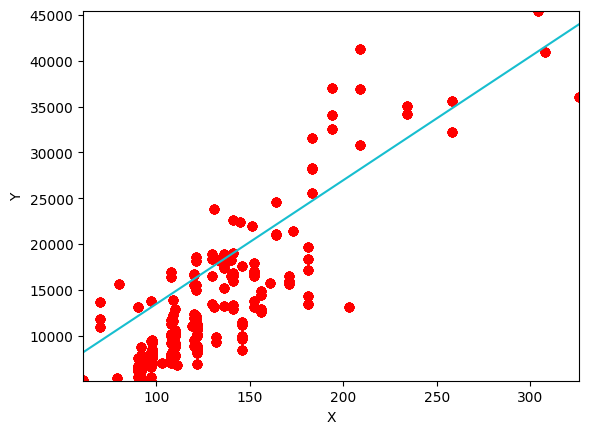

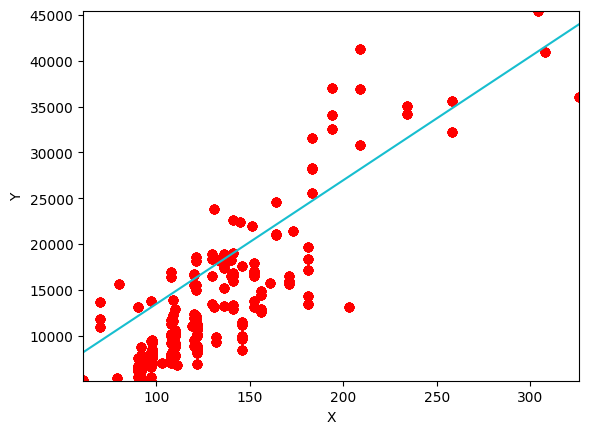

In [253]:
neurona_lineal = NeuronaLineal(alpha=0.00001, n_iter=10, cotaE=10e-06, random_state=None ,draw=1, title=['X', 'Y'])
neurona_lineal.fit(x,d)

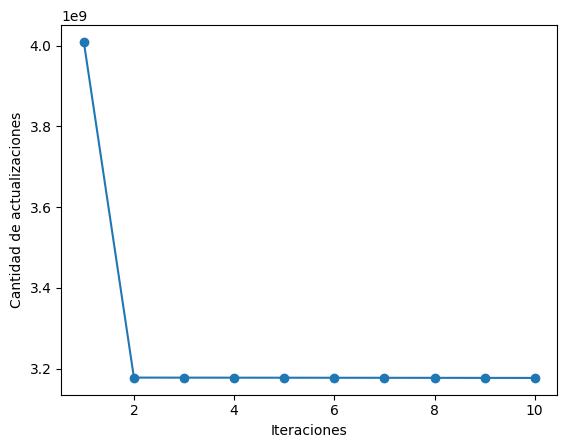

In [254]:
matplot.plot(range(1, len(neurona_lineal.errors_) + 1), neurona_lineal.errors_, marker='o')
matplot.xlabel('Iteraciones')
matplot.ylabel('Cantidad de actualizaciones')
matplot.show()

**Normalizacion lineal**

In [255]:
x = x.astype(float)

In [256]:
min = x.min()
rango = x.max() - min
for i in range(len(x)):
  x[i][0] = (x[i][0] - min)/rango

In [257]:
d = d.astype(float)

In [258]:
d

array([13495., 16500., 16500., 13950., 17450., 15250., 17710., 18920.,
       23875., 13207., 16430., 16925., 20970., 21105., 24565., 30760.,
       41315., 36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,
        6229.,  6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,
        5399.,  6529.,  7129.,  7295.,  7295.,  7895.,  9095.,  8845.,
       10295., 12945., 10345.,  6785., 13207., 13207., 11048., 32250.,
       35550., 36000.,  5195.,  6095.,  6795.,  6695.,  7395., 10945.,
       11845., 13645., 15645.,  8845.,  8495., 10595., 10245., 10795.,
       11245., 18280., 18344., 25552., 28248., 28176., 31600., 34184.,
       35056., 40960., 45400., 16503.,  5389.,  6189.,  6669.,  7689.,
        9959.,  8499., 12629., 14869., 14489.,  6989.,  8189.,  9279.,
        9279.,  5499.,  7099.,  6649.,  6849.,  7349.,  7299.,  7799.,
        7499.,  7999.,  8249.,  8949.,  9549., 13499., 14399., 13499.,
       17199., 19699., 18399., 11900., 13200., 12440., 13860., 15580.,
      

In [259]:
min = d.min()
rango = d.max() - min
for i in range(len(d)):
  d[i] = (d[i] - min)/rango

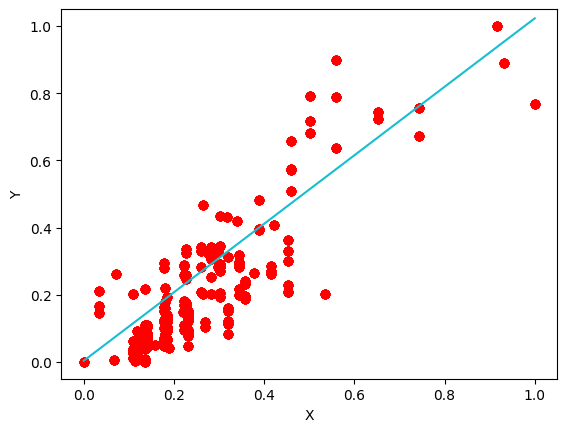

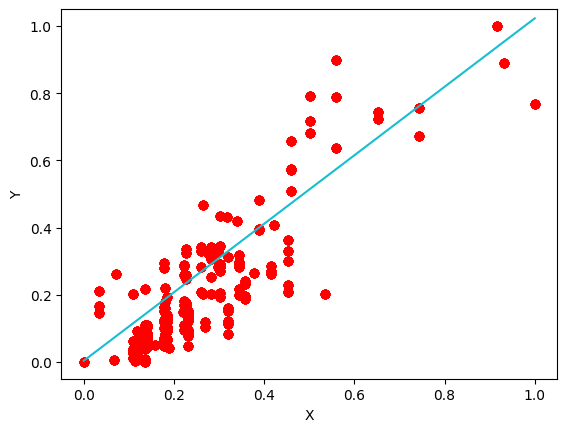

In [260]:
neurona_lineal = NeuronaLineal(alpha=0.1, n_iter=10, cotaE=10e-06, random_state=None ,draw=1, title=['X', 'Y'])
neurona_lineal.fit(x,d)

In [261]:
len(neurona_lineal.errors_)

10

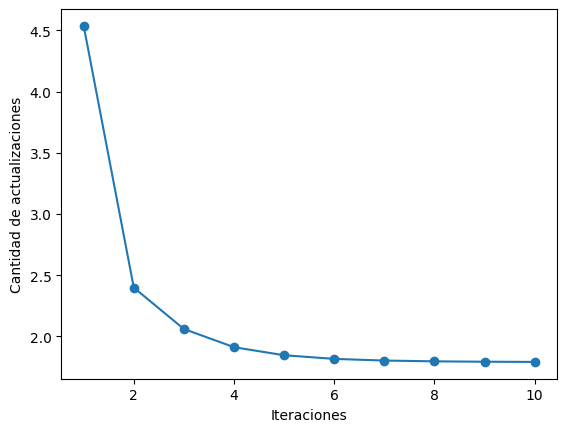

In [262]:
matplot.plot(range(1, len(neurona_lineal.errors_) + 1), neurona_lineal.errors_, marker='o')
matplot.xlabel('Iteraciones')
matplot.ylabel('Cantidad de actualizaciones')
matplot.show()

**Normalización con media y desvío**

In [263]:
df_autos = pd.read_csv('data/cars.csv')

In [264]:
price_elems_count = len(df_autos['price'])
x = np.array(df_autos['engine-size'])
d = np.zeros(shape=price_elems_count, dtype=int)

In [265]:
# Reemplazar los NaN con el promedio de la columna
df_autos['price'] = df_autos['price'].fillna(df_autos['price'].mean())

In [266]:
i = 0
for p in df_autos['price']:
    d[i] = p
    i = i + 1

In [267]:
x = x.reshape(-1,1)

In [268]:
x = x.astype(float)
d = d.astype(float)

In [269]:
media = x.mean()
std = x.std()
for i in range(len(x)):
  x[i][0] = (x[i][0] - media) / std
media = d.mean()
std = d.std()
for i in range(len(d)):
  d[i] = (d[i] - media) / std

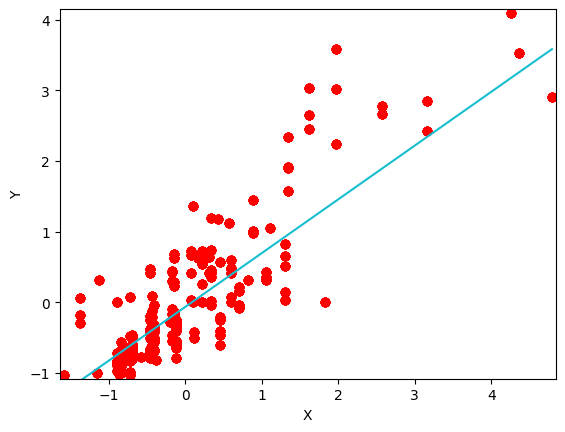

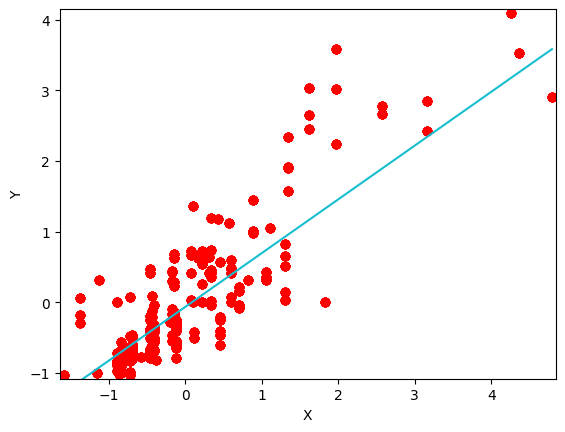

In [270]:
neurona_lineal = NeuronaLineal(alpha=0.001, n_iter=10, cotaE=10e-06, random_state=None ,draw=1, title=['X', 'Y'])
neurona_lineal.fit(x,d)

In [271]:
len(neurona_lineal.errors_)

10

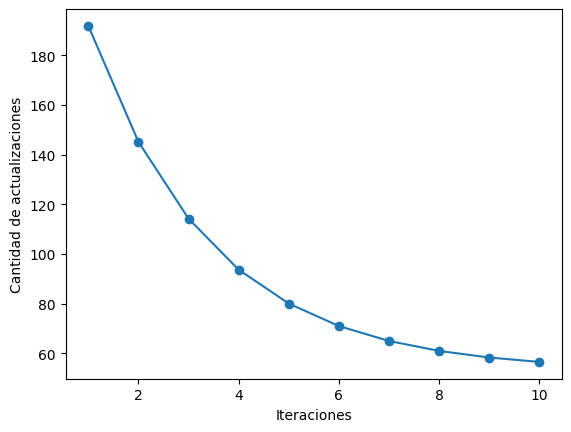

In [272]:
matplot.plot(range(1, len(neurona_lineal.errors_) + 1), neurona_lineal.errors_, marker='o')
matplot.xlabel('Iteraciones')
matplot.ylabel('Cantidad de actualizaciones')
matplot.show()

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

No normalizar los datos es un problema, si la recta cae en una buena ubicación y el alfa es un valor chico llega a acomdar la recta, pero si usamos un alfa estandar como 0.1, 0.01 etc. la recta nunca se termina de acomodar ni cerca.

En cuanto a normalizar arrajo valores similares, en 10 iteraciones llega a acomodar la recta dentro de la cota de error especificada, la cual es precisa.